# Imports

## Package Imports 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

## Data Imports 

In [2]:
df1_sleep_orig = pd.read_csv('person1_oura_2019-09-30_2020-09-30_trends.csv')

In [3]:
df2_sleep_orig = pd.read_csv('person2_oura_2020-07-22_2020-10-01_trends.csv')

In [4]:
df3_sleep_orig = pd.read_csv('person3_oura_2019-01-01_2020-09-22_trends.csv')

In [5]:
df_sleep = pd.concat([df1_sleep_orig, df2_sleep_orig, df3_sleep_orig])

In [6]:
df_sleep.head()

,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timing Score,Total Bedtime,Total Sleep Time,Awake Time,REM Sleep Time,Light Sleep Time,Deep Sleep Time,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Sleep Timing.1,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation (°C),Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Recovery Time Score,Activity Burn,Total Burn,Target Calories,Steps,Daily Movement,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,2020-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,100.0,100.0,78.0,100.0,99.0,98.0,3.0,1996.0,500.0,84.0,41.0,36.0,178.0,4.0,0.0,0.0,1222.0,1.09375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-26,75.0,77.0,86.0,97.0,93.0,69.0,72.0,30.0,30120.0,26700.0,3420.0,6420.0,13320.0,6960.0,31.0,89.0,270.0,15060.0,NaN,2020-08-26T01:08:26-04:00,2020-08-26T09:30:26-04:00,59.52,54.0,61.0,-0.31,14.000,94.0,100.0,100.0,78.0,100.0,97.0,100.0,161.0,1907.0,450.0,4551.0,3598.0,152.0,557.0,114.0,16.0,0.0,601.0,1.21875,0.0,79.0,66.0,0.0,0.0,0.0,93.0,94.0,0.0,75.0
2,2020-08-27,82.0,100.0,100.0,100.0,88.0,67.0,62.0,18.0,40980.0,35670.0,5310.0,9480.0,16770.0,9420.0,27.0,87.0,30.0,19950.0,NaN,2020-08-27T00:33:26-04:00,2020-08-27T11:56:26-04:00,58.30,53.0,60.0,-0.01,14.000,89.0,100.0,100.0,60.0,96.0,95.0,100.0,2.0,1682.0,550.0,28.0,51.0,18.0,640.0,1.0,0.0,0.0,781.0,1.06250,0.0,91.0,81.0,0.0,0.0,0.0,100.0,96.0,0.0,100.0
3,2020-08-28,77.0,79.0,74.0,100.0,97.0,67.0,81.0,42.0,29820.0,27300.0,2520.0,5490.0,12600.0,9210.0,29.0,92.0,450.0,14820.0,NaN,2020-08-28T00:48:15-04:00,2020-08-28T09:05:15-04:00,56.65,52.0,64.0,-0.11,14.000,78.0,100.0,100.0,43.0,71.0,66.0,100.0,1.0,1714.0,450.0,21.0,4.0,28.0,391.0,2.0,0.0,0.0,1019.0,1.12500,0.0,81.0,73.0,77.0,0.0,88.0,100.0,90.0,0.0,85.0
4,2020-08-29,61.0,55.0,54.0,95.0,72.0,59.0,91.0,20.0,26340.0,21030.0,5310.0,4050.0,11130.0,5850.0,37.0,80.0,720.0,12090.0,NaN,2020-08-29T02:32:46-04:00,2020-08-29T09:51:46-04:00,65.18,58.0,59.0,0.07,14.875,74.0,100.0,100.0,43.0,71.0,40.0,100.0,4.0,1728.0,450.0,119.0,63.0,4.0,316.0,6.0,0.0,0.0,1114.0,1.12500,0.0,71.0,48.0,74.0,0.0,88.0,99.0,76.0,0.0,77.0


In [7]:
df_sleep.shape

(714, 56)

In [8]:
df_sleep.dtypes

date                            object
Sleep Score                    float64
Total Sleep Score              float64
REM Sleep Score                float64
Deep Sleep Score               float64
Sleep Efficiency Score         float64
Restfulness Score              float64
Sleep Latency Score            float64
Sleep Timing Score             float64
Total Bedtime                  float64
Total Sleep Time               float64
Awake Time                     float64
REM Sleep Time                 float64
Light Sleep Time               float64
Deep Sleep Time                float64
Restless Sleep                 float64
Sleep Efficiency               float64
Sleep Latency                  float64
Sleep Timing                   float64
Sleep Timing.1                 float64
Bedtime Start                   object
Bedtime End                     object
Average Resting Heart Rate     float64
Lowest Resting Heart Rate      float64
Average HRV                    float64
Temperature Deviation (°C

# Data Transformations

## Column renaming 

In [9]:
df_sleep.rename(columns = lambda x: x.lower().replace(' ', '_'), inplace = True)

## Removing columns 

In [10]:
list_sleep_cols = ['date', 'sleep_score', 'total_bedtime', 'total_sleep_time',
                   'awake_time', 'rem_sleep_time', 'light_sleep_time',
                   'deep_sleep_time', 'restless_sleep', 'sleep_efficiency',
                   'sleep_latency', 'sleep_timing', 'bedtime_start',
                   'bedtime_end', 'average_resting_heart_rate',
                   'lowest_resting_heart_rate', 'average_hrv',
                   'temperature_deviation_(°c)', 'respiratory_rate']

In [11]:
df_sleep2 = df_sleep[list_sleep_cols].copy()

In [12]:
df_sleep3 = df_sleep2.copy()

## Dropping Nans 

In [13]:
df_sleep3.isnull().sum()

date                           0
sleep_score                   95
total_bedtime                 95
total_sleep_time              95
awake_time                    95
rem_sleep_time                95
light_sleep_time              95
deep_sleep_time               95
restless_sleep                95
sleep_efficiency              95
sleep_latency                 95
sleep_timing                  95
bedtime_start                 95
bedtime_end                   95
average_resting_heart_rate    95
lowest_resting_heart_rate     96
average_hrv                   96
temperature_deviation_(°c)    95
respiratory_rate              95
dtype: int64

In [14]:
df_sleep3.dropna(subset=['sleep_score', 'average_hrv'], inplace=True)

In [15]:
df_sleep3.isnull().sum()

date                          0
sleep_score                   0
total_bedtime                 0
total_sleep_time              0
awake_time                    0
rem_sleep_time                0
light_sleep_time              0
deep_sleep_time               0
restless_sleep                0
sleep_efficiency              0
sleep_latency                 0
sleep_timing                  0
bedtime_start                 0
bedtime_end                   0
average_resting_heart_rate    0
lowest_resting_heart_rate     0
average_hrv                   0
temperature_deviation_(°c)    0
respiratory_rate              0
dtype: int64

## Removing Outliers 

In [16]:
df_sleep4 = df_sleep3.copy()

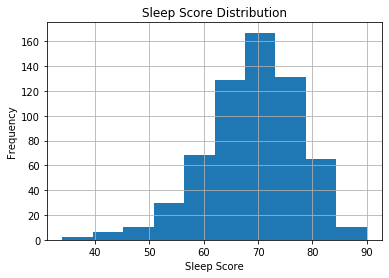

In [17]:
df_sleep4['sleep_score'].hist()
plt.title('Sleep Score Distribution');
plt.xlabel('Sleep Score')
plt.ylabel('Frequency');

In [18]:
df_sleep4.describe()

,sleep_score,total_bedtime,total_sleep_time,awake_time,rem_sleep_time,light_sleep_time,deep_sleep_time,restless_sleep,sleep_efficiency,sleep_latency,sleep_timing,average_resting_heart_rate,lowest_resting_heart_rate,average_hrv,temperature_deviation_(°c),respiratory_rate
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.00000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,69.113269,27589.514563,22967.038835,4622.475728,3788.786408,10757.281553,8420.970874,35.23301,83.490291,673.398058,13587.038835,57.261303,49.375405,81.962783,0.014207,14.362257
std,8.635240,4548.416444,3707.174454,2071.116530,1620.729166,2889.395363,1858.558031,6.56404,5.981392,497.707327,2356.468349,5.989387,5.243952,24.507603,0.275098,0.721581
min,34.000000,13320.000000,10830.000000,750.000000,90.000000,3150.000000,1980.000000,13.00000,48.000000,30.000000,6450.000000,45.740000,40.000000,10.000000,-0.670000,11.625000
25%,63.000000,24780.000000,20790.000000,3247.500000,2737.500000,8850.000000,7410.000000,31.00000,80.000000,330.000000,12187.500000,53.625000,46.000000,67.000000,-0.150000,14.000000
50%,70.000000,27780.000000,23070.000000,4170.000000,3660.000000,10635.000000,8460.000000,35.00000,84.000000,600.000000,13560.000000,56.360000,49.000000,82.500000,0.000000,14.250000
75%,75.000000,30180.000000,25350.000000,5730.000000,4740.000000,12540.000000,9622.500000,39.00000,88.000000,930.000000,14902.500000,59.565000,52.000000,100.000000,0.130000,14.750000
max,90.000000,49740.000000,38040.000000,16710.000000,11970.000000,22200.000000,14130.000000,62.00000,96.000000,6180.000000,24960.000000,86.810000,80.000000,157.000000,3.440000,20.250000


In [19]:
Q1 = df_sleep4.quantile(0.25)
Q3 = df_sleep4.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sleep_score                     12.00
total_bedtime                 5400.00
total_sleep_time              4560.00
awake_time                    2482.50
rem_sleep_time                2002.50
light_sleep_time              3690.00
deep_sleep_time               2212.50
restless_sleep                   8.00
sleep_efficiency                 8.00
sleep_latency                  600.00
sleep_timing                  2715.00
average_resting_heart_rate       5.94
lowest_resting_heart_rate        6.00
average_hrv                     33.00
temperature_deviation_(°c)       0.28
respiratory_rate                 0.75
dtype: float64


In [20]:
df_sleep5 = df_sleep4.loc[~((df_sleep4 < (Q1 - 1.5 * IQR)) |
                            (df_sleep4 > (Q3 + 1.5 * IQR))).any(axis=1)].copy()

In [21]:
df_s = df_sleep5.copy()

# Data Exploration

## Plotting 

In [22]:
df_s.shape

(518, 19)

In [23]:
df_s.head()

,date,sleep_score,total_bedtime,total_sleep_time,awake_time,rem_sleep_time,light_sleep_time,deep_sleep_time,restless_sleep,sleep_efficiency,sleep_latency,sleep_timing,bedtime_start,bedtime_end,average_resting_heart_rate,lowest_resting_heart_rate,average_hrv,temperature_deviation_(°c),respiratory_rate
1,2020-08-26,75.0,30120.0,26700.0,3420.0,6420.0,13320.0,6960.0,31.0,89.0,270.0,15060.0,2020-08-26T01:08:26-04:00,2020-08-26T09:30:26-04:00,59.52,54.0,61.0,-0.31,14.000
3,2020-08-28,77.0,29820.0,27300.0,2520.0,5490.0,12600.0,9210.0,29.0,92.0,450.0,14820.0,2020-08-28T00:48:15-04:00,2020-08-28T09:05:15-04:00,56.65,52.0,64.0,-0.11,14.000
4,2020-08-29,61.0,26340.0,21030.0,5310.0,4050.0,11130.0,5850.0,37.0,80.0,720.0,12090.0,2020-08-29T02:32:46-04:00,2020-08-29T09:51:46-04:00,65.18,58.0,59.0,0.07,14.875
9,2020-09-03,75.0,31380.0,27060.0,4320.0,6990.0,10680.0,9390.0,25.0,86.0,240.0,15390.0,2020-09-03T01:54:14-04:00,2020-09-03T10:37:14-04:00,57.95,52.0,52.0,-0.14,13.875
10,2020-09-04,75.0,26580.0,24120.0,2460.0,5190.0,11700.0,7230.0,22.0,91.0,510.0,13050.0,2020-09-04T00:41:53-04:00,2020-09-04T08:04:53-04:00,59.12,54.0,53.0,-0.28,14.500


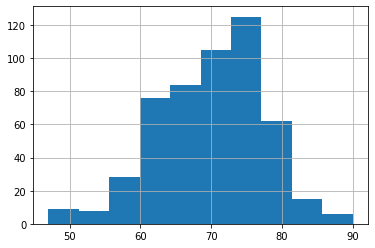

In [24]:
df_s['sleep_score'].hist()

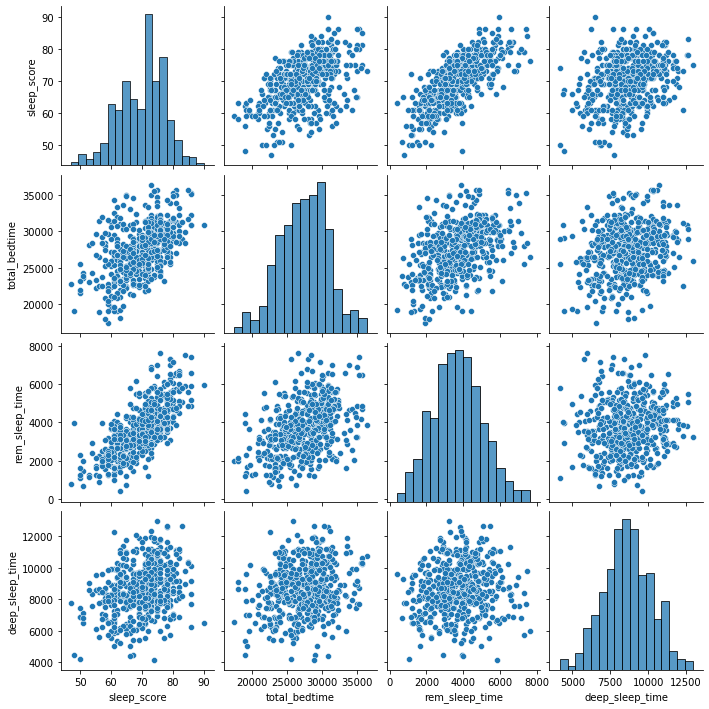

In [25]:
sns.pairplot(df_s[['sleep_score', 'total_bedtime',
                   'rem_sleep_time', 'deep_sleep_time']])

# Machine Learning Regressions 

## Data Prep 

In [26]:
list_raw_sleep_cols = ['total_bedtime', 'total_sleep_time', 'awake_time',
                       'rem_sleep_time', 'light_sleep_time',
                       'deep_sleep_time', 'restless_sleep', 'sleep_efficiency',
                       'sleep_latency', 'sleep_timing',
                       'average_resting_heart_rate', 
                       'lowest_resting_heart_rate', 'average_hrv',
                       'temperature_deviation_(°c)', 'respiratory_rate']
list_col_poly = [f'x{i}' for i in range(0, len(list_raw_sleep_cols))]
df_col_names = pd.DataFrame(list_col_poly, index=list_raw_sleep_cols,
                            columns=['Poly Name'])
df_col_names;

In [27]:
X = df_s[list_raw_sleep_cols]
y = df_s[['sleep_score']]

In [28]:
df_s[['sleep_score','total_bedtime', 'total_sleep_time', 'awake_time',
                       'rem_sleep_time', 'light_sleep_time',
                       'deep_sleep_time', 'restless_sleep', 'sleep_efficiency',
                       'sleep_latency', 'sleep_timing',
                       'average_resting_heart_rate', 
                       'lowest_resting_heart_rate', 'average_hrv',
                       'temperature_deviation_(°c)', 'respiratory_rate']].reset_index(drop=True)

,sleep_score,total_bedtime,total_sleep_time,awake_time,rem_sleep_time,light_sleep_time,deep_sleep_time,restless_sleep,sleep_efficiency,sleep_latency,sleep_timing,average_resting_heart_rate,lowest_resting_heart_rate,average_hrv,temperature_deviation_(°c),respiratory_rate
0,75.0,30120.0,26700.0,3420.0,6420.0,13320.0,6960.0,31.0,89.0,270.0,15060.0,59.52,54.0,61.0,-0.31,14.000
1,77.0,29820.0,27300.0,2520.0,5490.0,12600.0,9210.0,29.0,92.0,450.0,14820.0,56.65,52.0,64.0,-0.11,14.000
2,61.0,26340.0,21030.0,5310.0,4050.0,11130.0,5850.0,37.0,80.0,720.0,12090.0,65.18,58.0,59.0,0.07,14.875
3,75.0,31380.0,27060.0,4320.0,6990.0,10680.0,9390.0,25.0,86.0,240.0,15390.0,57.95,52.0,52.0,-0.14,13.875
4,75.0,26580.0,24120.0,2460.0,5190.0,11700.0,7230.0,22.0,91.0,510.0,13050.0,59.12,54.0,53.0,-0.28,14.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,76.0,29520.0,27030.0,2490.0,4320.0,14820.0,7890.0,42.0,92.0,180.0,14340.0,53.40,46.0,101.0,-0.27,15.000
514,69.0,25500.0,22260.0,3240.0,3030.0,9540.0,9690.0,34.0,87.0,600.0,12990.0,52.42,46.0,90.0,-0.08,14.625
515,63.0,23220.0,21150.0,2070.0,3150.0,7050.0,10950.0,37.0,91.0,270.0,11160.0,53.75,46.0,71.0,-0.30,14.000
516,74.0,28500.0,24360.0,4140.0,4950.0,7530.0,11880.0,30.0,85.0,1080.0,13890.0,55.45,46.0,91.0,0.07,13.875


## Train/ CV/ Test Split 

In [29]:
# We have split 80/20 between train/ cv and test
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=.20,
                                                          random_state=1)
# We will split our train/cv 60/20 into train and cv now.
X_train, X_cv, y_train, y_cv = train_test_split(X_train_cv, y_train_cv,
                                                test_size=.25,
                                                random_state=1)

## Linear Regression (No Regularization)

### Tuning polynomial features 

In [30]:
poly_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures()),
    ('ols', LinearRegression())    
])
mses = []
int_top_degree = 5 + 1
degree_range = range(1, int_top_degree)

for degree in degree_range:
    poly_pipe.set_params(poly__degree=degree)
    k_folds = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = -cross_val_score(poly_pipe, X_train_cv, y_train_cv, cv=k_folds, scoring='neg_mean_squared_error')
    mses.append(np.mean(scores))

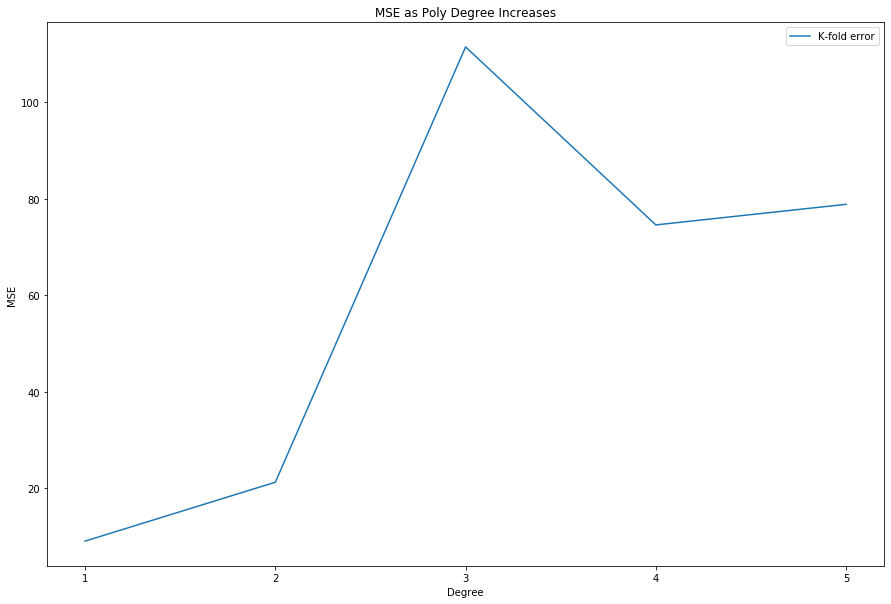

In [31]:
plt.subplots(figsize=(15, 10))

plt.plot(degree_range, mses, label='K-fold error')
plt.title('MSE as Poly Degree Increases')
plt.xlabel('Degree')
plt.xticks(range(1, int_top_degree, 1))
plt.ylabel('MSE')
plt.legend();

1st degree looks the best

In [32]:
poly_pipe_1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(1)),
    ('lr', LinearRegression())    
])
poly_pipe_1.fit(X_train, y_train)
y_train_pred = poly_pipe_1.predict(X_train)
y_cv_pred = poly_pipe_1.predict(X_cv)
print('Train error:', mean_squared_error(y_train_pred, y_train))
print('CV error:', mean_squared_error(y_cv_pred, y_cv))
print('R^2 train', r2_score(y_train_pred, y_train))
print('R^2 CV', r2_score(y_cv_pred, y_cv))

Train error: 7.862166235523839
CV error: 9.015730944677042
R^2 train 0.8256172402158666
R^2 CV 0.806547258614259


This is not bad, however the train error is a bit higher, let's try fitting a higher degree and seeing if that helps

In [33]:
poly_pipe_2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(2)),
    ('lr', LinearRegression())    
])
poly_pipe_2.fit(X_train, y_train)
y_train_pred = poly_pipe_2.predict(X_train)
y_cv_pred = poly_pipe_2.predict(X_cv)
print('Train error:', mean_squared_error(y_train_pred, y_train))
print('cv error:', mean_squared_error(y_cv_pred, y_cv))
print('R^2 train', r2_score(y_train_pred, y_train))
print('R^2 cv', r2_score(y_cv_pred, y_cv))

Train error: 4.608198785205041
cv error: 10.571545436405218
R^2 train 0.9046367166880102
R^2 cv 0.7826129572509906


We see a nice bump in our train but now we are overfitting so regularization should help

These are our test errors and residuals

### Model Performance 

In [34]:
y_test_pred = poly_pipe_1.predict(X_test)
print('Test error:', mean_squared_error(y_test_pred, y_test))
print('R^2 Test', r2_score(y_test_pred, y_test))

Test error: 7.819542503414246
R^2 Test 0.8331123193886565


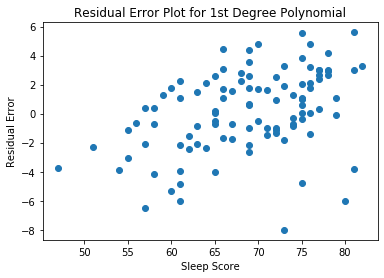

In [35]:
list_resid = y_test - y_test_pred
plt.scatter(y_test, list_resid)
plt.title('Residual Error Plot for 1st Degree Polynomial')
plt.xlabel('Sleep Score')
plt.ylabel('Residual Error');

In [36]:
y_test_pred = poly_pipe_2.predict(X_test)
print('Test error:', mean_squared_error(y_test_pred, y_test))
print('R^2 Test', r2_score(y_test_pred, y_test))

Test error: 9.293003380871736
R^2 Test 0.8128438580404866


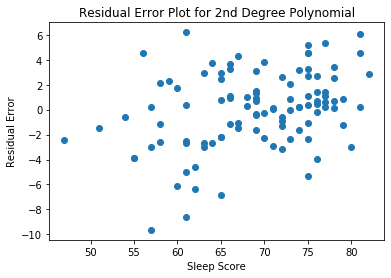

In [37]:
list_resid = y_test - y_test_pred
plt.scatter(y_test, list_resid)
plt.title('Residual Error Plot for 2nd Degree Polynomial')
plt.xlabel('Sleep Score')
plt.ylabel('Residual Error');

### Feature Weights 

In [38]:
df_coef_poly1 = pd.DataFrame(
    poly_pipe_1.named_steps['lr'].coef_[0], 
    index=poly_pipe_1.named_steps['poly'].get_feature_names(),
    columns=['coefficients'])
df_coef_poly1['abs_value'] = np.abs(df_coef_poly1['coefficients'])
df_coef_poly1.sort_values(by='abs_value', ascending=False, inplace=True)

In [39]:
df_coef_poly2 = pd.DataFrame(
    poly_pipe_2.named_steps['lr'].coef_[0], 
    index=poly_pipe_2.named_steps['poly'].get_feature_names(),
    columns=['coefficients'])
df_coef_poly2['abs_value'] = np.abs(df_coef_poly2['coefficients'])
df_coef_poly2.sort_values(by='abs_value', ascending=False, inplace=True)

## Ridge Regularization 

### Tuning alpha regularization parameter 

In [40]:
poly_pipe_ridge_tune = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(2)),
    ('ridge', Ridge(alpha=0.01))    
])
mses_ridge_tune = []
list_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for i, alpha in enumerate(list_alphas):
    poly_pipe_ridge_tune.set_params(ridge__alpha=alpha)
    poly_pipe_ridge_tune.fit(X_train, y_train)
    mses_ridge_tune.append(mean_squared_error(poly_pipe_ridge_tune.predict(X_cv), y_cv))

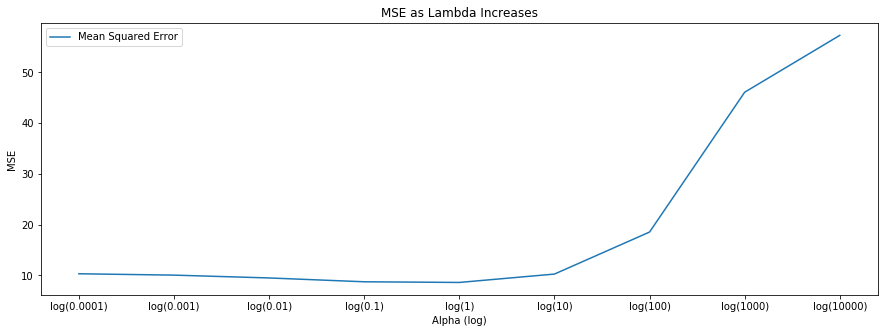

In [41]:
fig, ax = plt.subplots(figsize=(15, 5))

labels = ['log({})'.format(alpha) for alpha in list_alphas]
ax.plot(np.log(list_alphas), mses_ridge_tune, label='Mean Squared Error')
ax.set_title('MSE as Lambda Increases')
ax.set_xlabel('Alpha (log)')
ax.set_xticks(np.log(list_alphas))
ax.set_xticklabels(labels)
ax.set_ylabel('MSE')
plt.legend();

alpha of 0.1 looks pretty good

### Model Performance 

In [42]:
poly_pipe_ridge = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(2)),
    ('ridge', Ridge(alpha=0.1))    
])
poly_pipe_ridge.fit(X_train, y_train)
y_train_pred = poly_pipe_ridge.predict(X_train)
y_cv_pred = poly_pipe_ridge.predict(X_cv)
y_test_pred = poly_pipe_ridge.predict(X_test)
print('Train error:', mean_squared_error(y_train_pred, y_train))
print('CV error:', mean_squared_error(y_cv_pred, y_cv))
print('R^2 train', r2_score(y_train_pred, y_train))
print('R^2 CV', r2_score(y_cv_pred, y_cv))

Train error: 5.368786698353211
CV error: 8.760594252533833
R^2 train 0.8852363684142273
R^2 CV 0.8186162000594266


In [43]:
y_test_pred = poly_pipe_ridge.predict(X_test)
print('Test error:', mean_squared_error(y_test_pred, y_test))
print('R^2 Test', r2_score(y_test_pred, y_test))

Test error: 7.016493398932413
R^2 Test 0.8538463783357451


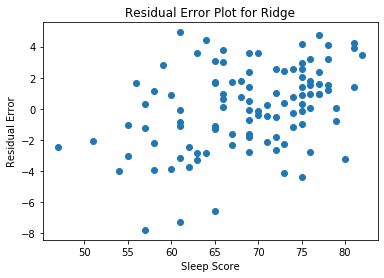

In [44]:
arr_resid = np.ravel(y_test) - np.ravel(y_test_pred)
plt.scatter(y_test, arr_resid)
plt.title('Residual Error Plot for Ridge')
plt.xlabel('Sleep Score')
plt.ylabel('Residual Error');

In [45]:
df_coef_ridge = pd.DataFrame(
    poly_pipe_ridge.named_steps['ridge'].coef_[0], 
    index=poly_pipe_ridge.named_steps['poly'].get_feature_names(),
    columns=['coefficients'])
df_coef_ridge['abs_value'] = np.abs(df_coef_ridge['coefficients'])
df_coef_ridge.sort_values(by='abs_value', ascending=False, inplace=True)

## Lasso Regularization 

### Tuning alpha regularization parameter 

In [46]:
poly_pipe_lasso_tune = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(2)),
    ('lasso', Lasso(alpha=0.01))    
])
mses_lasso_tune = []
list_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for i, alpha in enumerate(list_alphas):
    poly_pipe_lasso_tune.set_params(lasso__alpha=alpha)
    poly_pipe_lasso_tune.fit(X_train, y_train)
    mses_lasso_tune.append(mean_squared_error(poly_pipe_lasso_tune.predict(X_cv), y_cv))

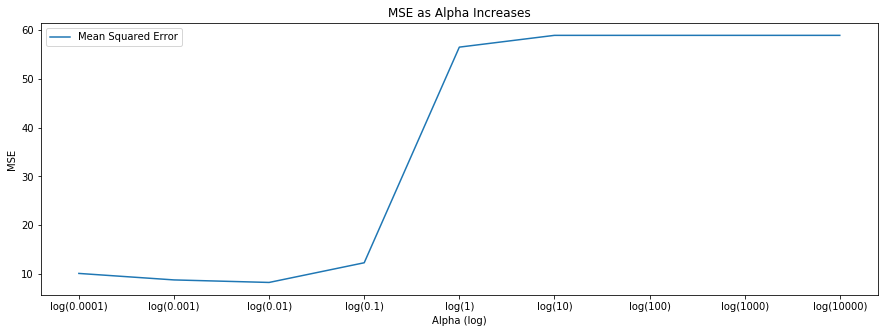

In [47]:
fig, ax = plt.subplots(figsize=(15, 5))
labels = ['log({})'.format(alpha) for alpha in list_alphas]
ax.plot(np.log(list_alphas), mses_lasso_tune, label='Mean Squared Error')
ax.set_title('MSE as Alpha Increases')
ax.set_xlabel('Alpha (log)')
ax.set_xticks(np.log(list_alphas))
ax.set_xticklabels(labels)
ax.set_ylabel('MSE')
plt.legend();

alpha at 0.01 looks pretty good 

### Model Performance 

In [48]:
poly_pipe_lasso = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(2)),
    ('lasso', Lasso(alpha=0.01))    
])
poly_pipe_lasso.fit(X_train, y_train)
y_train_pred = poly_pipe_lasso.predict(X_train)
y_cv_pred = poly_pipe_lasso.predict(X_cv)

print('Train error:', mean_squared_error(y_train_pred, y_train))
print('CV error:', mean_squared_error(y_cv_pred, y_cv))
print('R^2 train', r2_score(y_train_pred, y_train))
print('R^2 CV', r2_score(y_cv_pred, y_cv))

Train error: 6.461727239067043
CV error: 8.245371966729595
R^2 train 0.8545747238357478
R^2 CV 0.820832208399982


In [49]:
y_test_pred = poly_pipe_lasso.predict(X_test)
print('Test error:', mean_squared_error(y_test_pred, y_test))
print('R^2 Test', r2_score(y_test_pred, y_test))

Test error: 6.909770372289929
R^2 Test 0.8459522680657822


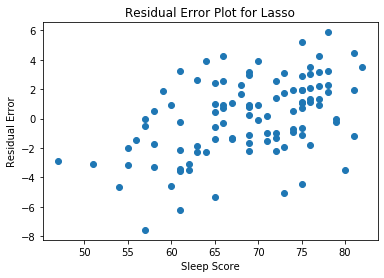

In [50]:
arr_resid = np.ravel(y_test) - y_test_pred
plt.scatter(y_test, arr_resid)
plt.title('Residual Error Plot for Lasso')
plt.xlabel('Sleep Score')
plt.ylabel('Residual Error');

### Feature Weights 

In [51]:
df_coef_lasso = pd.DataFrame(
    poly_pipe_lasso.named_steps['lasso'].coef_, 
    index=poly_pipe_lasso.named_steps['poly'].get_feature_names(),
    columns=['coefficients'])
df_coef_lasso['abs_value'] = np.abs(df_coef_lasso['coefficients'])
df_coef_lasso.sort_values(by='abs_value', ascending=False, inplace=True)

# Results

In terms of performance, here is how all of our models did:

| Name                         | Test Error (MSE) | R^2  |
|------------------------------|------------|------|
| Linear Regression (1st poly) | 7.82       | .833 |
| Linear Regression (2nd poly) | 9.29       | .812 |
| Ridge Regression (2nd poly)  | 7.02       | .853 |
| Lasso Regression (2nd poly)  | 6.91       | .846 |

## Key for column names 

In [52]:
df_col_names

,Poly Name
total_bedtime,x0
total_sleep_time,x1
awake_time,x2
rem_sleep_time,x3
light_sleep_time,x4
deep_sleep_time,x5
restless_sleep,x6
sleep_efficiency,x7
sleep_latency,x8
sleep_timing,x9


## Linear Regression Feature Weights 

In [53]:
df_coef_poly1[0:10]

,coefficients,abs_value
x1,5.162403e+12,5.162403e+12
x4,-2.862000e+12,2.862000e+12
x5,-2.033343e+12,2.033343e+12
x0,-1.671559e+12,1.671559e+12
x3,-1.601606e+12,1.601606e+12
x2,6.905456e+11,6.905456e+11
x11,-1.035304e+01,1.035304e+01
x10,6.414513e+00,6.414513e+00
x8,5.933236e+00,5.933236e+00
x7,5.771393e+00,5.771393e+00


In [54]:
df_coef_poly2[0:10]

,coefficients,abs_value
x1,-5.539724e+12,5.539724e+12
x4,3.967866e+12,3.967866e+12
x4 x14,2.484397e+12,2.484397e+12
x2 x5,2.187260e+12,2.187260e+12
x1 x10,-2.176709e+12,2.176709e+12
x1 x9,2.078283e+12,2.078283e+12
x0 x4,1.918921e+12,1.918921e+12
x0 x2,-1.894953e+12,1.894953e+12
x0 x5,-1.886974e+12,1.886974e+12
x1 x14,-1.855827e+12,1.855827e+12


## Ridge Feature Weights 

In [55]:
df_coef_ridge[0:10]

,coefficients,abs_value
x8^2,-12.443564,12.443564
x2 x11,-7.886487,7.886487
x11 x13,6.845456,6.845456
x1,6.833075,6.833075
x5 x6,6.742540,6.742540
x0,6.184041,6.184041
x8,5.761828,5.761828
x6 x12,-5.321361,5.321361
x3 x14,5.279315,5.279315
x8 x11,5.272684,5.272684


## Lasso Feature Weights 

In [56]:
df_coef_lasso[0:10]

,coefficients,abs_value
x1,25.263196,25.263196
x8,12.135663,12.135663
x2 x11,-10.297554,10.297554
x8^2,-9.485920,9.485920
x3,7.557305,7.557305
x6^2,-4.677333,4.677333
x14^2,-4.188943,4.188943
x7 x10,3.220343,3.220343
x5 x6,3.083881,3.083881
x0^2,-2.948963,2.948963
